In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#defining the data set
#each point in length, width and type(0,1)
trainedData = [[3,1.5,1],
               [2,1,0],
               [4,1.5,1],
               [3,1,0],
               [3.5,.5,1],
               [2,.5,0],
               [5.5,1,1],
               [1,1,0]]

testData = [4.5,1,1]

In [ ]:
#activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#derivative of sigmoid with respect to z
#also call sigmoid curve gradient
def sigmoid_P(z):
    return sigmoid(z)*(1-sigmoid(z))

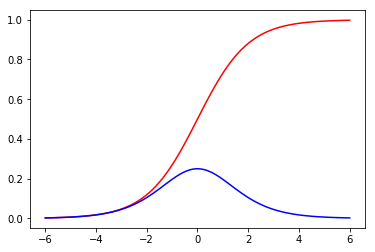

In [6]:
#experement by ploting sigmoid graph
T = np.linspace(-6,6,100)
#print(T)
y = sigmoid(T)
y_P = sigmoid_P(T)
#print(y)

#for i in T:
 #   print (sigmoid(i), )
    
plt.plot(T,y,c='r')  #sigmoid graph
plt.plot(T,y_P,c='B') #derivative of sigmoid graph

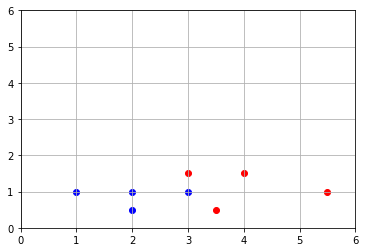

In [7]:
#Scatter the data point

plt.axis([0,6,0,6])
plt.grid()

for i in range(len(trainedData)):
    point = trainedData[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0],point[1],c=color)

In [37]:
#initialize the learning rate, weight and the bias

learningRate = 0.1

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

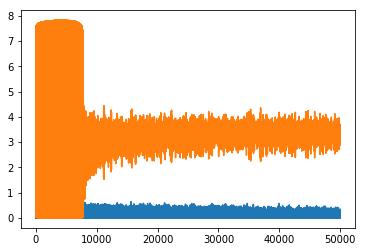

In [38]:
#traning loop

allCost = []
allTotalCost = []

for i in range(50000):
    predectData = trainedData[np.random.randint(len(trainedData))]
    z = predectData[0]*w1 + predectData[1]*w2 + b
    #print(z)
    predectResult = sigmoid(z)
    
    terget = predectData[2]
    
    cost = np.square(predectResult - terget)
    
    ''''
    if i%1000 == 0:
        print('predect-',predectResult)
        print('cost-',cost,'\n')
     '''
    
    allCost.append(cost)   #appent the cost
    
    #calculation the total cost at the current weight and bias for all data point    
    cost_sum = 0    
    for i in range(len(trainedData)):
        p = trainedData[i]
        x = p[0]*w1 + p[1]*w2 + b
        cost_sum += np.square(sigmoid(x) - terget)
        
    allTotalCost.append(cost_sum)
    
    
    #calculating the derivative of the cost function with respect to peredectResult,z,w1,w2,b
    
    dCost_dPre = 2 * (predectResult - terget) #derivative of 'cost' function with respect to 'predect'
    dPre_dZ = sigmoid_P(z)                    #derivative of  'predect result' (sigmoid function) with respect to 'z' 
    
    dZ_dW1 = predectData[0]                   #derivative of 'z'(z = predectData[0]*w1 + predectData[1]*w2 + b) function with respect to 'w1' 
    dZ_dW2 = predectData[1]                   #derivative of 'z'(z = predectData[0]*w1 + predectData[1]*w2 + b) function with respect to 'w2'
    dZ_dB = 1                                 #derivative of 'z'(z = predectData[0]*w1 + predectData[1]*w2 + b) function with respect to 'b'
    
    dCost_dW1 = dCost_dPre * dPre_dZ * dZ_dW1 #derivative of 'cost' function with respect to 'w1'
    dCost_dW2 = dCost_dPre * dPre_dZ * dZ_dW2 #derivative of 'cost' function with respect to 'w2'
    dCost_dB = dCost_dPre * dPre_dZ * dZ_dB  #derivative of 'cost' function with respect to 'b'
    
    dCost_dZ = dCost_dPre * dPre_dZ           #derivative of 'cost' function with respect to 'z'
    
    #dCost_dW1 = dCost_dZ * dZ_dW1
    #dCost_dW2 = dCost_dZ * dZ_dW2
    #dCost_dW1 = dCost_dZ * dZ_dB
    
    
    #updating the weight
    w1 = w1 - learningRate * dCost_dW1
    w2 = w2 - learningRate * dCost_dW2
    b = b - learningRate * dCost_dB
    
    #Adjust weight by = error*input*output*(1-output)


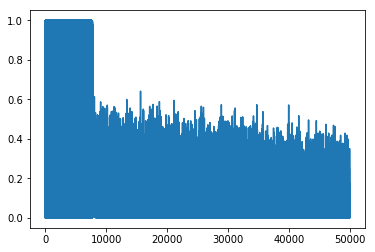

In [41]:
plt.plot(allCost)


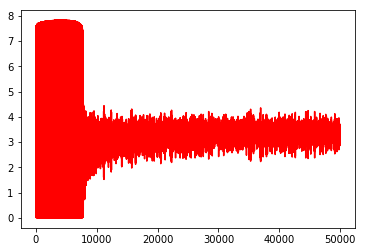

In [48]:
plt.plot(allTotalCost,c='r')

In [51]:
#seeing model predection

for i in range(len(trainedData)):
        p = trainedData[i]
        x = p[0]*w1 + p[1]*w2 + b
        result = sigmoid(x)
        print(p,'\n',"Predected result : {}".format(result))


[3, 1.5, 1] 
 Predected result : 0.7750235447408527
[2, 1, 0] 
 Predected result : 0.01412932638831443
[4, 1.5, 1] 
 Predected result : 0.9967646346403894
[3, 1, 0] 
 Predected result : 0.5617340234086969
[3.5, 0.5, 1] 
 Predected result : 0.8185040347347298
[2, 0.5, 0] 
 Predected result : 0.005304042657203595
[5.5, 1, 1] 
 Predected result : 0.9999896848893605
[1, 1, 0] 
 Predected result : 0.0001602287536658188


In [52]:
#eveluting with test data

p = testData
x = p[0]*w1 + p[1]*w2 + b
result = sigmoid(x)
print(p,'\n',"Predected result : {}".format(result))

[4.5, 1, 1] 
 Predected result : 0.9990783428892347


In [56]:
def NN(m1,m2):
    z = m1*w1+m2*w2+b
    predectResut = sigmoid(z)
    predectText = ["blue","red"][int(np.round(predectResut))]
    print (predectText)

In [58]:
predectResut = NN(.5,1)


blue
